In [2]:
# from sir_enkf import run 
import numpy as np
from utils import load_obj

In [3]:
from utils import reverse_map

In [5]:
beta_t = 0.005
gamma_t = 0.002
trends = load_obj(r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\paper_data\case1\obe\trends_addedd_50beta0.005_gamma0.002_fraction0.002")

In [14]:
path = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\res_1209-10\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.001_Rx0.005_N50_L10.npy"
res = np.load(path)
def cal_acc(beta_t, gamma_t, trends, res):
    ave_beta = np.array([((reverse_map(i) - beta_t)**2)/(beta_t**2) for i in res[-50:,2]]).mean()
    ave_gamma = np.array([((reverse_map(j) - gamma_t)**2)/(gamma_t**2) for j in res[-50:,3]]).mean()
    ave_i = np.array([((a-b)/b)**2 for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[15:]/8846)]).mean()
    ave_r = np.array([((a-b)/b)**2 for a,b in zip(res[:,1][15:], np.array(trends[0]['trends']['node_count'][2])[15:]/8846)]).mean()
    return ave_beta, ave_gamma, ave_i, ave_r
a,b,c,d = cal_acc(beta_t, gamma_t, trends, res)
print((a,b,c,d))
print("{:.4e}".format(a+b))
print("{:.4e}".format(c+d))

(0.09417311783831069, 2.126577861128693, 0.0005733214383886635, 0.3232227400703742)
2.2208e+00
3.2380e-01


In [71]:
np.array(trends[0]['trends']['node_count'][2])[10:]

array([   0,    0,    1, ..., 6799, 6799, 6799])

In [104]:
for a,b in zip(res[:,0][15:], np.array(trends[0]['trends']['node_count'][1])[15:]/8846):
    print(a,b)

0.004880076064932049 0.0028261361067148994
0.005024963696745677 0.0028261361067148994
0.0051472571531714015 0.0028261361067148994
0.005265222314177189 0.0028261361067148994
0.0042543558374789165 0.0028261361067148994
0.004303231806436224 0.0028261361067148994
0.005014998441664936 0.0028261361067148994
0.005209849208488216 0.0029391815509834953
0.005589082271330193 0.0029391815509834953
0.0063072564059142655 0.0029391815509834953
0.006461260503017489 0.0029391815509834953
0.006579512742427101 0.0028261361067148994
0.006686750471682851 0.0029391815509834953
0.006781382740843547 0.0029391815509834953
0.002905642114947747 0.0028261361067148994
0.0031584919153925385 0.0028261361067148994
0.0032076532988643525 0.0029391815509834953
0.0033082965838389634 0.003052226995252091
0.0033708336178723364 0.003052226995252091
0.00348799094304976 0.0031652724395206874
0.00352138824401208 0.0031652724395206874
0.0035975305194675756 0.0032783178837892833
0.003645288642861501 0.003391363328057879
0.003775

In [105]:
print(res[:,0][15:])

[0.00488008 0.00502496 0.00514726 ... 0.00722557 0.00715006 0.00757019]


In [63]:
np.array(trends[0]['trends']['node_count'][1])[15:]/8846

array([0.00282614, 0.00282614, 0.00282614, ..., 0.00983495, 0.00983495,
       0.00983495])

In [144]:
path = r"C:\Users\xinji\Documents\理论论文\卡尔曼滤波\paper_code\scen1\res_1209-10\all\beta0.01_gamma0.01_meaboth_Qx0.0001_Qp0.0001_Px_0.0005_Pp0.01_Rx0.005_N50_L10_before.npy"
res = np.load(path)

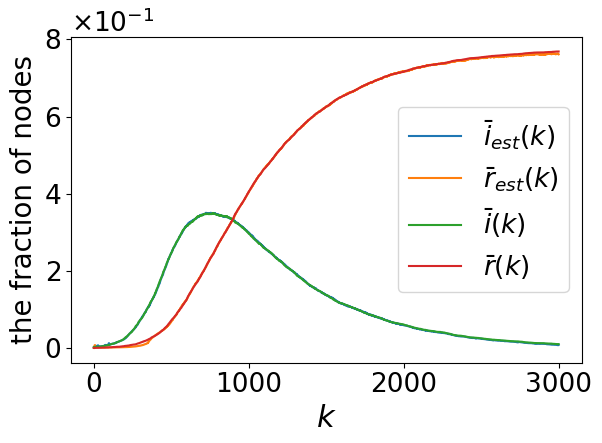

In [145]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':19})
fig, ax1 = plt.subplots() 
ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot(res[:,0], label = r"$\bar{i}_{est}(k)$")
ax1.plot(res[:,1], label = r"$\bar{r}_{est}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][1])/8846, label = r"$\bar{i}(k)$")
ax1.plot(np.array(trends[0]['trends']['node_count'][2])/8846, label = r"$\bar{r}(k)$")
plt.tight_layout()
plt.legend()
plt.show()

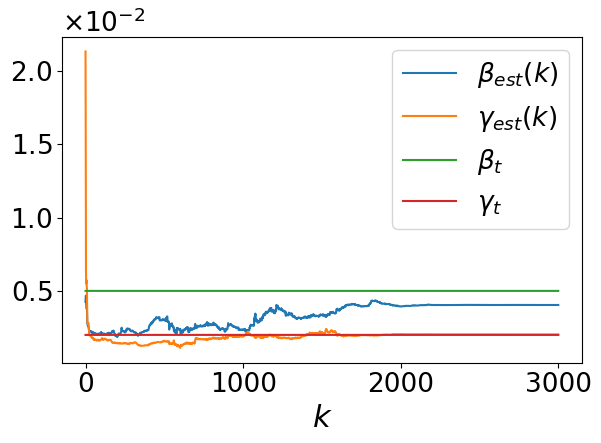

In [139]:
from utils import reverse_map
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({'font.size':19})
fig, ax1 = plt.subplots() 
# ax1.set_ylabel(r"the fraction of nodes", fontsize = 20, rotation = 90)
ax1.set_xlabel(r"$k$", fontsize = 22)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 设置为科学计数法
formatter.set_powerlimits((-1, 1))  # 设置科学计数法的阈值，这里设置为-3到3
plt.gca().yaxis.set_major_formatter(formatter)
ax1.plot([reverse_map(i) for i in res[:,2]], label = r"$\beta_{est}(k)$")
ax1.plot([reverse_map(i) for i in res[:,3]], label = r"$\gamma_{est}(k)$")
ax1.plot([0.005 for i in res[:,0]], label = r"$\beta_{t}$")
ax1.plot([0.002 for i in res[:,0]], label = r"$\gamma_{t}$")
plt.tight_layout()
ax1.legend(loc = "best")
plt.show()